Actividad 6: Redes Neuronales

Nombre: Debanny Michelle Martínez García

Matricula: 2022210

Inteligencia Artificial y Redes Neuronales

Hora: N4

Dia: L, M y V

In [1]:
#Librerias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
#Conjunto de datos
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_data, test_data = train_data / 255.0, test_data / 255.0

11490434/11490434 [==============================] - 0s 0us/step


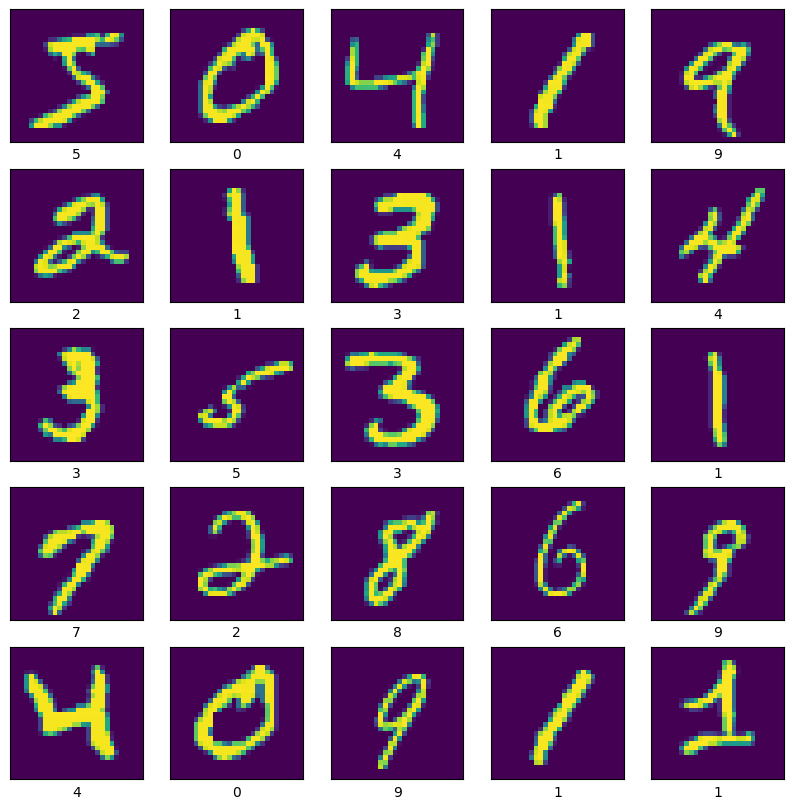

In [3]:
#Verificación de datos
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i])
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [ ]:
#Imagenes de entrenamiento
train_data.shape

(60000, 28, 28)

In [ ]:
#Imagenes de prueba
test_data.shape

(10000, 28, 28)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='softmax'))

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
Total params: 42728 (166.91 KB)
Trainable params: 4272

In [36]:
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
 flatten_3 (Flatten)         (None, 504)              

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
#Entrenar el modelo
history = model.fit(train_data, train_label, epochs=5, validation_data = (test_data, test_label))

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2478 - accuracy: 0.9260 - val_loss: 0.0644 - val_accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0423 - val_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0294 - val_accuracy: 0.9913


In [40]:
#Evaluar Exactitud
test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0294 - accuracy: 0.9913 - 2s/epoch - 7ms/step

Test accuracy: 0.9912999868392944


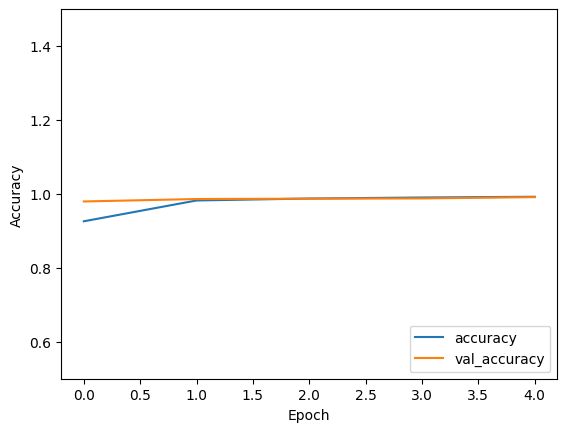

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.5])
plt.legend(loc='lower right')

In [ ]:
#Predicciones
predictions = model.predict(test_data)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.3956110e-07, 3.0590695e-07, 1.9081122e-07, 4.8388913e-04,
       1.6612870e-12, 4.6907047e-09, 1.9634552e-14, 9.9950975e-01,
       4.6668995e-07, 5.0095828e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_label[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('lightblue')
  thisplot[true_label].set_color('violet')

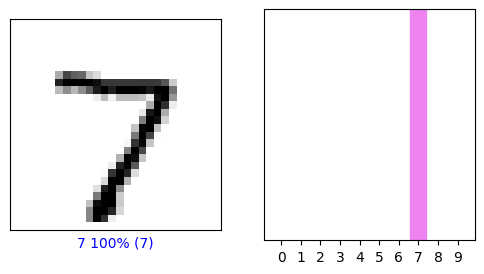

In [ ]:
#Predicción 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

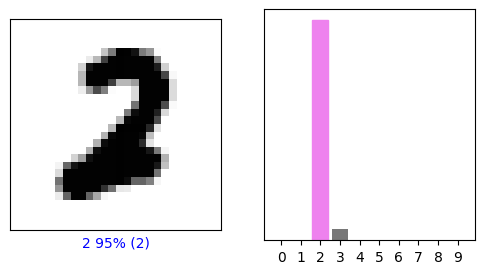

In [ ]:
#Predicción 2
i = 199
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

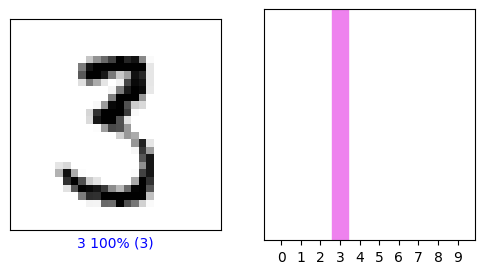

In [ ]:
#Predicción 3
i = 1997
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

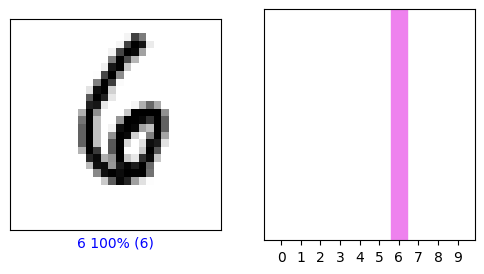

In [ ]:
#Predicción 4
i = 4926
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

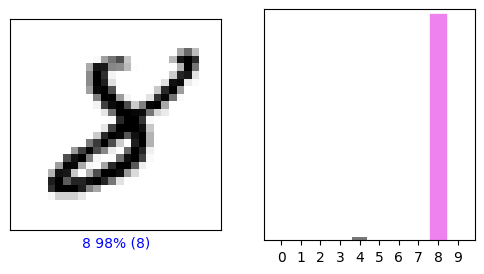

In [ ]:
#Predicción 5
i = 9926
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

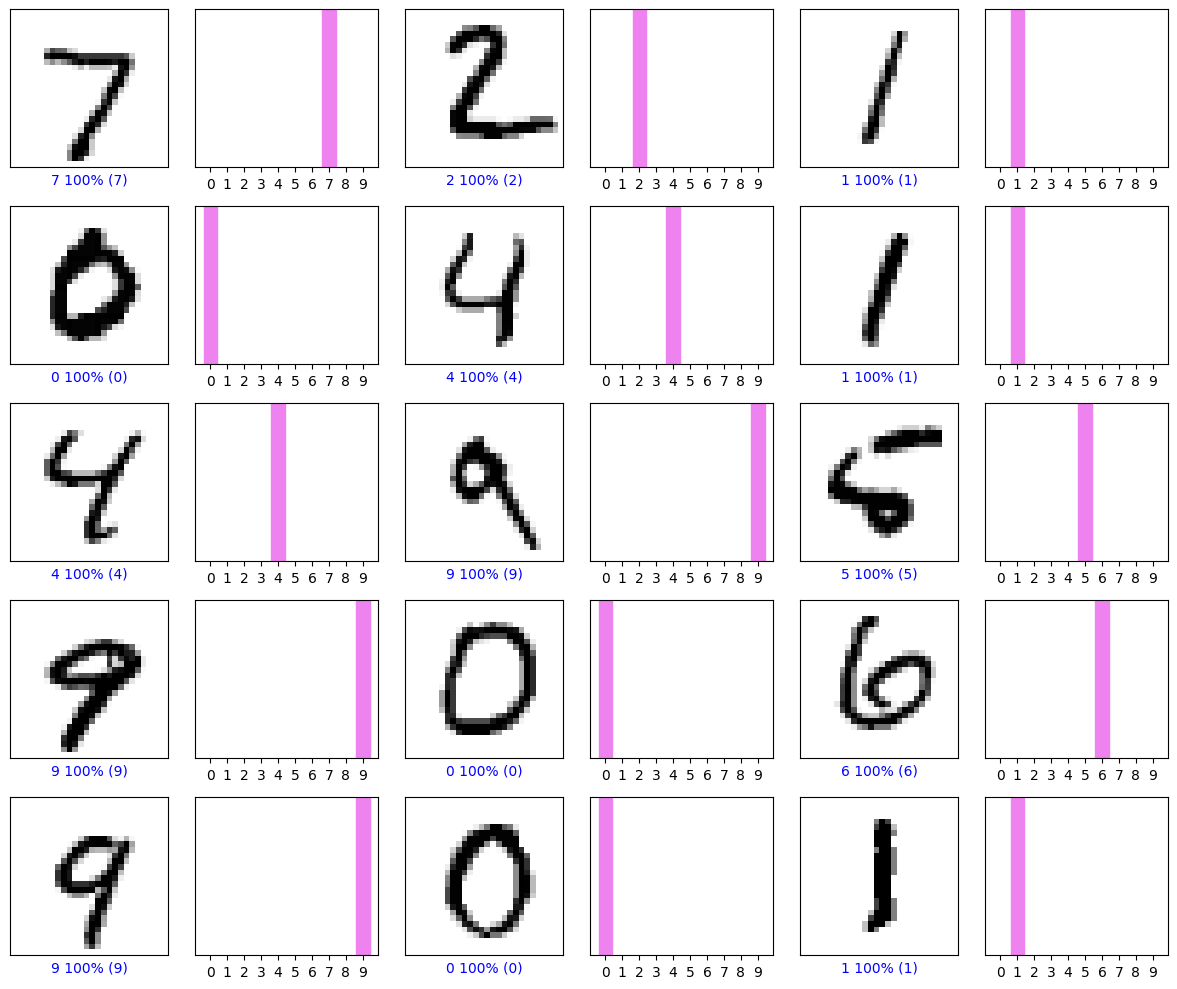

In [ ]:
#Conjunto de predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()

**Responde las siguientes preguntas:**

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
Utilice una cantidad menor, que la actividad pasada.


¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
Se obtuvo un mejor rendimiento, ya que en la actividad pasada se obtuvo un 97% y en la actual se obtuvo un 99%, esto debido a que la red neuronal convolucional tiene un mejor rendimiento.